<a href="https://colab.research.google.com/github/new5558/superai-handwritten-digit-hackathon-solution/blob/master/Super_AI_handwriting_digit_hackathon_raw_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###This is raw & dirty notebook with various ablative studies. Clean notebook will be available after pitching on this Github repository: https://github.com/new5558/superai-handwritten-digit-hackathon-top3-solution

# Import depedencies

In [ ]:
import numpy as np
import scipy.io
import pandas as pd
import cv2

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from tqdm.auto import tqdm

In [ ]:
def show_image_dataset(image):
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# MNIST N digit 

In [ ]:
!git init
!git remote add origin https://github.com/google/n-digit-mnist
!git pull origin master

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (8/8), done.
remote: Total 43 (delta 7), reused 7 (delta 7), pack-reused 35
Unpacking objects: 100% (43/43), done.
From https://github.com/google/n-digit-mnist
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> origin/master


In [ ]:
!./download.sh

--2022-01-16 03:43:42--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘data/train-images-idx3-ubyte.gz’

data/train-images-i 100%[===================>]   9.45M  --.-KB/s    in 0.1s    

2022-01-16 03:43:42 (83.7 MB/s) - ‘data/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2022-01-16 03:43:42--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘data/train-labels-idx1-ubyte.gz’

data/train-labels-i 1

In [ ]:
!python n_digit_mnist.py --num_digits 4 --domain_gap number

In [ ]:
three_instance_data = np.load('./n-digit-mnist/standard_datasets/dataset_mnist_3_instance_train.npz')

In [ ]:
three_instance_data

In [ ]:
np_array[:,:,:1]

In [ ]:
mat = scipy.io.loadmat('pendigits.mat')

In [ ]:
mat

In [ ]:
mat['X'].shape

In [ ]:
mat['X'][0]

In [ ]:
pd.Series(mat['y'].reshape(-1)).value_counts()

# ARDIS dataset

## Download dataset

In [ ]:
!wget https://raw.githubusercontent.com/ardisdataset/ARDIS//Updates-Date-String/Date%20Strings%20Part%20I.zip

In [ ]:
!wget https://raw.githubusercontent.com/ardisdataset/ARDIS/master/ARDIS_DATASET_II.rar

In [ ]:
!unzip "Date Strings Part I.zip"

In [ ]:
!unrar x ARDIS_DATASET_II.rar

## Dataset I

### Get image from path

In [ ]:
ex_df = pd.read_excel('Part I.xlsx')

In [ ]:
ex_df

In [ ]:
ex_df['Image_Left'].isna().value_counts()

In [ ]:
ex_df['Image_Right'].isna().value_counts()

In [ ]:
import cv2

test_data = cv2.imread('./Part I/v120849.b2690.s262.jpg')
test_data2 = cv2.imread('./Part I/T_v120849.b2690.s262.jpg')

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(test_data, cv2.COLOR_BGR2RGB))

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(test_data2, cv2.COLOR_BGR2RGB))

In [ ]:
from tqdm.auto import tqdm

In [ ]:
images = []
images_label = []
for i, row in tqdm(ex_df.iterrows(), total=ex_df.shape[0]):
  img_path = row['Image_Left']
  image = cv2.imread(f'./Part I/{img_path}.jpg')
  images.append(image)
  images_label.append(row['Date'])

In [ ]:
images = np.array(images)
images_label = np.array(images_label)

In [ ]:
images.shape

In [ ]:
images_label

In [ ]:
images

### EDA

In [ ]:
ratios = []

for image in images:
  ratio = image.shape[0]/image.shape[1]
  ratios.append(ratio)

In [ ]:
# Explore image ratio distribution
pd.Series(ratios).hist()

### Preprocess data

In [ ]:
plt.imshow(cv2.cvtColor(test_data, cv2.COLOR_BGR2RGB))

In [ ]:
blur = cv2.GaussianBlur(test_data,(5,5),0)
img_gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU) # Remove background using OTSU threshold
threshrgb = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)

In [ ]:
plt.imshow(cv2.cvtColor(threshrgb, cv2.COLOR_BGR2RGB))

In [ ]:
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))

In [ ]:
# img_gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
# # ret, thresh = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU) # Remove background using OTSU threshold
# thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
# # thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
# threshrgb = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)

images_white_ardis = []
for image in images:
  # blur = cv2.GaussianBlur(image,(5,5),0)

  blur = cv2.GaussianBlur(image,(5,5),0)
  img_gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU) # Remove background using OTSU threshold
  # thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
  # thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
  threshrgb = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)
  images_white_ardis.append(threshrgb)

images_white_ardis = np.array(images_white_ardis)

In [ ]:
images_white_ardis.shape

In [ ]:
plt.imshow(cv2.cvtColor(images_white_ardis[0], cv2.COLOR_BGR2RGB))

### Try transformers OCR from Huggingface - TrOCR



In [ ]:
from Levenshtein import distance
import numpy as np

In [ ]:
import torch

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

In [ ]:
# from transformers import TrOCRProcessor, VisionEncoderDecoderModel
# import requests 
# from PIL import Image

# processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten") 
# model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten").to(device)

# # load image from the IAM dataset 
# url = "https://fki.tic.heia-fr.ch/static/img/a01-122-02.jpg" 
# image_handwritting = Image.open(requests.get(url, stream=True).raw).convert("RGB")

In [ ]:
!wget https://huggingface.co/microsoft/trocr-base-handwritten/raw/main/vocab.json

--2022-01-16 08:39:01--  https://huggingface.co/microsoft/trocr-base-handwritten/raw/main/vocab.json
Resolving huggingface.co (huggingface.co)... 54.205.126.93, 34.204.221.201, 52.22.206.115, ...
Connecting to huggingface.co (huggingface.co)|54.205.126.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 898822 (878K) [application/json]
Saving to: ‘vocab.json’

vocab.json          100%[===================>] 877.76K  2.28MB/s    in 0.4s    

2022-01-16 08:39:02 (2.28 MB/s) - ‘vocab.json’ saved [898822/898822]



In [ ]:
import json
 
# Opening JSON file
with open('vocab.json') as json_file:
    vacab_dict = json.load(json_file)

In [ ]:
vacab_dict

{'<s>': 0,
 '<pad>': 1,
 '</s>': 2,
 '<unk>': 3,
 '.': 4,
 'Ġthe': 5,
 ',': 6,
 'Ġto': 7,
 'Ġand': 8,
 'Ġof': 9,
 'Ġa': 10,
 'Ġin': 11,
 '-': 12,
 'Ġfor': 13,
 'Ġthat': 14,
 'Ġon': 15,
 'Ġis': 16,
 'âĢ': 17,
 "'s": 18,
 'Ġwith': 19,
 'ĠThe': 20,
 'Ġwas': 21,
 'Ġ"': 22,
 'Ġat': 23,
 'Ġit': 24,
 'Ġas': 25,
 'Ġsaid': 26,
 'Ļ': 27,
 'Ġbe': 28,
 's': 29,
 'Ġby': 30,
 'Ġfrom': 31,
 'Ġare': 32,
 'Ġhave': 33,
 'Ġhas': 34,
 ':': 35,
 'Ġ(': 36,
 'Ġhe': 37,
 'ĠI': 38,
 'Ġhis': 39,
 'Ġwill': 40,
 'Ġan': 41,
 'Ġthis': 42,
 ')': 43,
 'ĠâĢ': 44,
 'Ġnot': 45,
 'Ŀ': 46,
 'Ġyou': 47,
 'ľ': 48,
 'Ġtheir': 49,
 'Ġor': 50,
 'Ġthey': 51,
 'Ġwe': 52,
 'Ġbut': 53,
 'Ġwho': 54,
 'Ġmore': 55,
 'Ġhad': 56,
 'Ġbeen': 57,
 'Ġwere': 58,
 'Ġabout': 59,
 ',"': 60,
 'Ġwhich': 61,
 'Ġup': 62,
 'Ġits': 63,
 'Ġcan': 64,
 'Ġone': 65,
 'Ġout': 66,
 'Ġalso': 67,
 'Ġ$': 68,
 'Ġher': 69,
 'Ġall': 70,
 'Ġafter': 71,
 '."': 72,
 '/': 73,
 'Ġwould': 74,
 "'t": 75,
 'Ġyear': 76,
 'Ġwhen': 77,
 'Ġfirst': 78,
 'Ġshe': 79,
 'Ġtwo': 

In [ ]:
def num_there(s):
    return any(i.isdigit() for i in s)

In [ ]:
numberic_keys = list(filter(lambda key: num_there(key), vacab_dict.keys()))
# numberic_keys = list(filter(lambda key: key.isnumeric(), vacab_dict.keys()))
numberic_index = list(map(lambda key: vacab_dict[key], numberic_keys))

In [ ]:
len(vacab_dict.keys())

In [ ]:
len(numberic_index)

In [ ]:
pd.Series(numberic_index).hist()

In [ ]:
def get_text_transformeres(image):
  pixel_values = processor(image, return_tensors="pt").pixel_values

  pixel_values_tensor = torch.tensor(pixel_values).cuda()

  generated_ids = model.generate(pixel_values_tensor)
  generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
  return generated_text

In [ ]:
def get_text_transformeres_numeric(image, numeric_index):
  pixel_values = processor(image, return_tensors="pt").pixel_values

  pixel_values_tensor = torch.tensor(pixel_values).cuda()

  # global generated_ids
  result_generated = model.generate(pixel_values_tensor, return_dict_in_generate=True, output_scores=True)
  numeric_index_copy = [2, *numeric_index]

  torch_generated_scores = torch.stack(result_generated['scores'])
  torch_generated_scores = torch_generated_scores.view((torch_generated_scores.shape[0], torch_generated_scores.shape[2]))
  selected_scores = torch_generated_scores[:,numeric_index_copy]
  argmax = torch.argmax(selected_scores, dim = 1).cpu().detach().numpy()

  # print(argmax, numeric_index_copy, 'torch_generated_scores')
  
  new_result = np.array(numeric_index_copy)[argmax][None]
  
  # print(new_result, 'torch_generated_scores2')
  # print(result_generated, 'generated_ids')
  generated_text = processor.batch_decode(result_generated['sequences'], skip_special_tokens=True)[0]
  generated_text_2 = processor.batch_decode(new_result, skip_special_tokens=True)[0]
  return generated_text, generated_text_2

In [ ]:
show_image_dataset(test_data)

In [ ]:
# torch_generated_scores = torch.stack(generated_ids['scores'])
# torch_generated_scores = torch_generated_scores.view((torch_generated_scores.shape[0], torch_generated_scores.shape[2]))

In [ ]:
# torch_generated_scores.shape

In [ ]:
# torch.argmax(torch_generated_scores, dim = 1)

In [ ]:
# generated_ids['sequences']

In [ ]:
# generated_ids['scores']

In [ ]:
get_text_transformeres_numeric(images_white_ardis[200], numberic_index)

In [ ]:
show_image_dataset(images_white_ardis[200])

In [ ]:
show_image_dataset(threshrgb)

In [ ]:
get_text_transformeres_numeric(threshrgb, numberic_index)

In [ ]:
get_text_transformeres(threshrgb)

In [ ]:
image_handwritting

In [ ]:
get_text_transformeres(image_handwritting)

In [ ]:
def filter_number(text):
  numeric_filter = filter(str.isdigit, text)
  return "".join(numeric_filter)

In [ ]:
def filter_number_2(text):
  text_split = text.split(" ")
  results = []
  for text in text_split:
    numeric_filter = filter(str.isdigit, text)
    result = "".join(numeric_filter)
    if result.strip() != "":
      results.append(result)

  if len(results) == 0:
    return ""
  
  return max(results, key=len)

In [ ]:
filter_number('1 2 3334. 324ojk dsjfkhdf kl 234234.   ')

In [ ]:
filter_number_2('1 2 3334. 324ojk dsjfkhdf kl 234234.   ')

In [ ]:
distance('test', 'test3')

#### Evaluate raw images

In [ ]:
images_train, images_test, images_label_train, images_label_test = train_test_split(images, images_label, test_size = 0.1, random_state = 42)

In [ ]:
result_distances = []
for i in tqdm(range(len(images_test))):
  image = images[i]
  label = str(images_label_test[i])
  pred_text = get_text_transformeres(image)
  pred_text_clean = filter_number(pred_text)
  result_distance = distance(pred_text_clean, label)
  result_distances.append(result_distance)

In [ ]:
show_image_dataset(images_test[0])

In [ ]:
show_image_dataset(images_test[1])

In [ ]:
show_image_dataset(images_test[2])

In [ ]:
sum(result_distances)

In [ ]:
pd.Series(result_distances).hist()

In [ ]:
sum(result_distances) / len(result_distances)

#### Evaluate preprocessed image

In [ ]:
images_white_ardis_train, images_white_ardis_test, images_white_ardis_label_train, images_white_ardis_label_test = train_test_split(images_white_ardis, images_label, test_size = 0.1, random_state = 42)

In [ ]:
show_image_dataset(images_white_ardis_test[0])

In [ ]:
show_image_dataset(images_white_ardis_test[1])

In [ ]:
show_image_dataset(images_white_ardis_test[2])

In [ ]:
result_distances = []
pred_texts = []
pred_text_cleans = []
for i in tqdm(range(len(images_white_ardis_test))):
  image = images_white_ardis_test[i]
  label = str(images_white_ardis_label_test[i])
  pred_text = get_text_transformeres(image)
  pred_text_clean = filter_number_2(pred_text)
  result_distance = distance(pred_text_clean, label)
  
  result_distances.append(result_distance)
  pred_texts.append(pred_text)
  pred_text_cleans.append(pred_text_clean)

In [ ]:
sum(result_distances)

In [ ]:
pd.Series(result_distances).hist()

In [ ]:
sum(result_distances) / len(result_distances)

##### Error analysis

In [ ]:
result_distances_array = np.array(result_distances)
false_index_one = np.where(result_distances_array == 4)
false_index_one

In [ ]:
error_anslysis_index = false_index_one[0][9]

In [ ]:
show_image_dataset(images_white_ardis_test[error_anslysis_index])

In [ ]:
print(pred_texts[error_anslysis_index])
print(pred_text_cleans[error_anslysis_index])
print(images_white_ardis_label_test[error_anslysis_index])

_____

In [ ]:
false_index_two = np.where(result_distances_array == 2)
false_index_two

In [ ]:
error_anslysis_index = false_index_two[0][15]

In [ ]:
show_image_dataset(images_white_ardis_test[error_anslysis_index])

In [ ]:
print(pred_texts[error_anslysis_index])
print(pred_text_cleans[error_anslysis_index])
print(images_white_ardis_label_test[error_anslysis_index])

#### Evaluate preprocessed image - numeric only

In [ ]:
images_white_train, images_white_test, images_white_label_train, images_white_label_test = train_test_split(images_white_ardis, images_label, test_size = 0.1, random_state = 42)

In [ ]:
show_image_dataset(images_white_test[0])

In [ ]:
show_image_dataset(images_white_test[1])

In [ ]:
show_image_dataset(images_white_test[2])

In [ ]:
result_distances = []
pred_texts = []
pred_text_cleans = []
for i in tqdm(range(len(images_white_test))):
  image = images_white_test[i]
  label = str(images_white_label_test[i])
  pred_text = get_text_transformeres_numeric(image, numberic_index)[1]
  pred_text_clean = filter_number(pred_text)
  result_distance = distance(pred_text_clean, label)
  
  result_distances.append(result_distance)
  pred_texts.append(pred_text)
  pred_text_cleans.append(pred_text_clean)

In [ ]:
sum(result_distances)

In [ ]:
pd.Series(result_distances).hist()

In [ ]:
sum(result_distances) / len(result_distances)

##### Error analysis

In [ ]:
result_distances_array = np.array(result_distances)
false_index_one = np.where(result_distances_array == 4)
false_index_one

In [ ]:
error_anslysis_index = false_index_one[0][10]

In [ ]:
show_image_dataset(images_white_test[error_anslysis_index])

In [ ]:
print(pred_texts[error_anslysis_index])
print(pred_text_cleans[error_anslysis_index])
print(images_white_label_test[error_anslysis_index])

_____

In [ ]:
false_index_two = np.where(result_distances_array == 2)
false_index_two

In [ ]:
error_anslysis_index = false_index_two[0][15]

In [ ]:
show_image_dataset(images_white_test[error_anslysis_index])

In [ ]:
print(pred_texts[error_anslysis_index])
print(pred_text_cleans[error_anslysis_index])
print(images_white_label_test[error_anslysis_index])

### Character detection

In [ ]:
img = threshrgb
(h, w) = img.shape[:2]
image_size = h*w
mser = cv2.MSER_create()
mser.setMaxArea(int(image_size/2))
mser.setMinArea(10)

regions, rects = mser.detectRegions(thresh)

imgs_cropped = []
# With the rects you can e.g. crop the letters
for (x, y, w, h) in rects:
    cropped_image = thresh[y:y+h, x:x+w]
    imgs_cropped.append(cropped_image)
    cv2.rectangle(img, (x, y), (x+w, y+h), color=(255, 0, 255), thickness=1)

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
len(imgs_cropped)

In [ ]:
plt.imshow(cv2.cvtColor(imgs_cropped[0], cv2.COLOR_BGR2RGB))

In [ ]:
plt.imshow(cv2.cvtColor(threshrgb, cv2.COLOR_BGR2RGB))

In [ ]:
img_gray = cv2.cvtColor(test_data, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
# cv2.imshow('Binary image', thresh)

In [ ]:
threshrgb = cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB)

In [ ]:
plt.imshow(cv2.cvtColor(threshrgb, cv2.COLOR_BGR2RGB))

In [ ]:
threshrgb.shape

In [ ]:
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))

In [ ]:
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))

In [ ]:
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
image_copy = test_data.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
# cv2.imshow('None approximation', image_copy)
plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
# cv2.waitKey(0)
# cv2.imwrite('contours_none_image1.jpg', image_copy)
# cv2.destroyAllWindows()

## Dataset II

In [ ]:
# images_digit = []
# images_digit_label = []
# for i, row in tqdm(ex_df.iterrows(), total=ex_df.shape[0]):
#   img_path = row['Image_Left']
#   image = cv2.imread(f'./Part I/{img_path}.jpg')
#   images.append(image)
#   images_label.append(row['Date'])

In [ ]:
import os

data_folder = './ARDIS_DATASET_II'


images_digit = []
images_digit_label = []

for folder in os.listdir(data_folder):
  label = folder
  for file_name in os.listdir(f'./ARDIS_DATASET_II/{folder}'):
    path = f'./ARDIS_DATASET_II/{folder}/{file_name}'
    image = cv2.imread(path)
    image = cv2.resize(image, (32, 32))


    # image = cv2.GaussianBlur(image,(5,5),0)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # ret, thresh = cv2.threshold(image,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    # image = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)

    images_digit.append(image)
    images_digit_label.append(label)

In [ ]:
images_digit = np.array(images_digit)
images_digit_label = np.array(images_digit_label)

In [ ]:
images_digit.shape

In [ ]:
images_digit_label.shape

In [ ]:
images_digit_label

In [ ]:
images_digit_label[10]

In [ ]:
plt.imshow(cv2.cvtColor(images_digit[10], cv2.COLOR_BGR2RGB))

In [ ]:
from numpy import array
from numpy import argmax
from tensorflow.keras.utils import to_categorical
# define example
data = array(images_digit_label)
print(data)
# one hot encode
encoded = to_categorical(data)
print(encoded)
# invert encoding
inverted = argmax(encoded[0])
print(inverted)

In [ ]:
encoded.shape

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images_digit , encoded, test_size=0.1)

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
x_test.shape

In [ ]:
y_test.shape

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=[0.8,1.2]
    )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(
    x_train,
    y_train,
    batch_size=256,)

validation_generator = test_datagen.flow(
    x_test,
    y_test,
    batch_size=256,)

In [ ]:
from tensorflow.keras.applications import VGG16 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dropout, Dense, GlobalAveragePooling2D, Flatten

vgg16 = VGG16( 
    include_top=False,
    weights="imagenet",
    input_shape=(32, 32, 3)
)

model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

# for layer in efficient_net.layers:
# #     print(layer)
#     layer.trainable = False

model.summary()

In [ ]:
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

In [ ]:
model.fit(train_generator, epochs=10, validation_data = validation_generator)

In [ ]:
model.predict(x_test[10])

In [ ]:
model.evaluate(validation_generator)

# New Dataset

In [ ]:
!ls drive/MyDrive/OCR_data

SuperAI2-2869_1633.jpg	SuperAI2-2869_4611.jpg	 SuperAI2-2869_62.jpg
SuperAI2-2869_1873.jpg	SuperAI2-2869_51236.jpg  SuperAI2-2869_8.jpg
SuperAI2-2869_1.jpg	SuperAI2-2869_5563.jpg
SuperAI2-2869_4343.jpg	SuperAI2-2869_61.jpg


In [ ]:
import os
import cv2
import regex

mock_dataset_path = "drive/MyDrive/OCR_data"
superai_images = []
superai_labels = []


for img_path in os.listdir(mock_dataset_path):
  superai_id_matcher = '-\d+_'
  superai_id = regex.search(superai_id_matcher, img_path).group()[1:-1]
  # print(superai_id, 'super_ai')
  
  label_matcher = '_\d+.'
  label = regex.search(label_matcher, img_path).group()[1:-1]
  superai_labels.append(label)
  # print(label, 'label')

  image = cv2.imread(f"{mock_dataset_path}/{img_path}")
  superai_images.append(image)

In [ ]:
superai_images = np.array(superai_images)
superai_labels = np.array(superai_labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
print(superai_images.shape)
print(superai_labels.shape)

(10,)
(10,)


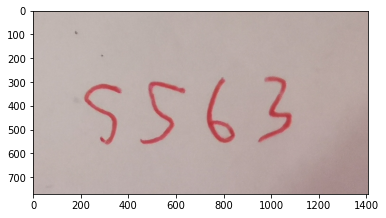

In [ ]:
show_image_dataset(superai_images[0])

In [ ]:
superai_images_white = []
for image in superai_images:
  blur = cv2.GaussianBlur(image,(5,5),0)
  img_gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU) # Remove background using OTSU threshold
  threshrgb = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)
  superai_images_white.append(threshrgb)

superai_images_white = np.array(superai_images_white)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


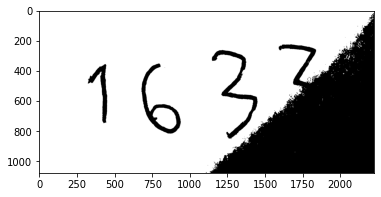

In [ ]:
show_image_dataset(threshrgb)

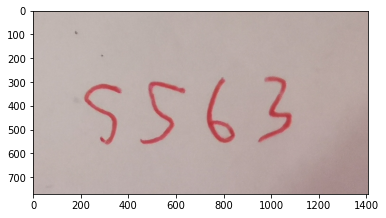

In [ ]:
show_image_dataset(superai_images[0])

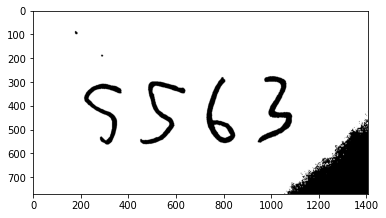

In [ ]:
show_image_dataset(superai_images_white[0])

In [ ]:
image = superai_images[5]


blur = cv2.GaussianBlur(image,(5,5),0)

# kernel = np.array([[0, -1, 0],
#                    [-1, 5,-1],
#                    [0, -1, 0]])
# image_sharp = cv2.filter2D(src=blur, ddepth=-1, kernel=kernel)

img_gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
# ret, thresh = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU) # Remove background using OTSU threshold
# thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
threshrgb = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)

# alpha = 0.7 # Contrast control (1.0-3.0)
# beta = 100 # Brightness control (0-100)

# adjusted = cv2.convertScaleAbs(threshrgb, alpha=alpha, beta=beta)

In [ ]:
# kernel = np.array([[0, -1, 0],
#                    [-1, 5,-1],
#                    [0, -1, 0]])
# # image_sharp = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

# kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# image_sharp = cv2.filter2D(image, -1, kernel)

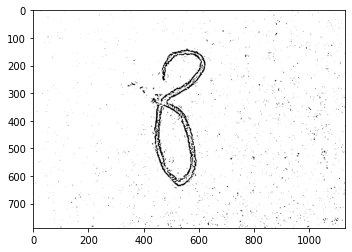

In [ ]:
show_image_dataset(threshrgb)

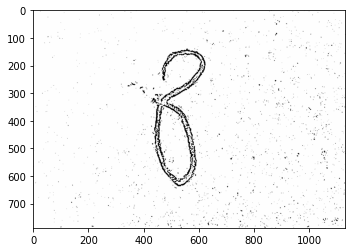

In [ ]:
dst = cv2.fastNlMeansDenoisingColored(threshrgb, None, 10, 10, 7, 15)
show_image_dataset(dst)

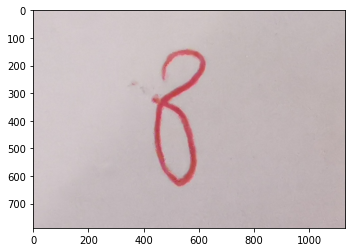

In [ ]:
show_image_dataset(image)

# Another dataset

In [ ]:
!wget https://www.orand.cl/orand_car/ORAND-CAR-2014.tar.gz

--2022-01-16 09:02:10--  https://www.orand.cl/orand_car/ORAND-CAR-2014.tar.gz
Resolving www.orand.cl (www.orand.cl)... 162.241.225.60
Connecting to www.orand.cl (www.orand.cl)|162.241.225.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203530245 (194M) [application/x-gzip]
Saving to: ‘ORAND-CAR-2014.tar.gz’

ORAND-CAR-2014.tar. 100%[===================>] 194.10M  49.1MB/s    in 4.4s    

2022-01-16 09:02:14 (44.1 MB/s) - ‘ORAND-CAR-2014.tar.gz’ saved [203530245/203530245]



In [ ]:
!tar -xf ORAND-CAR-2014.tar.gz

In [ ]:
dataset_path = "./ORAND-CAR-2014/CAR-A/a_test_images"

In [ ]:
f = open("./ORAND-CAR-2014/CAR-A/a_test_gt.txt", "r")
image_path_file = f.read()

In [ ]:
image_path_s = np.array(list(map(lambda x: x.split('\t'), image_path_file.split('\n')[:-1])))

In [ ]:
car_images_paths = image_path_s[:,0]
car_images_labels = image_path_s[:,1]

In [ ]:
import os
import cv2
import regex

superai_images_2 = []
superai_labels_2 = []


for i in tqdm(range(len(car_images_paths))):
  img_path = car_images_paths[i]
  # print(index_path)
  image = None
  


  image = cv2.imread(f"{dataset_path}/{img_path}")


  label =  car_images_labels[i]
  superai_labels_2.append(label)
  superai_images_2.append(image)

  0%|          | 0/3784 [00:00<?, ?it/s]

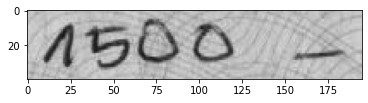

In [ ]:
show_image_dataset(superai_images_2[0])

# Small + Test 1 testset

### List data

In [ ]:
!ls drive/MyDrive/SmallTest

00700310666e007443e58fb5361bda30.jpg   897d266a963661d9bf56dcd4046fb6d5.jpeg
07be2bf533df6bfb6cbdc7a9dda6a1e7.jpg   8bd7df6da60a6ad6ff121d8dd00f19e7.png
0845d50182053845f944200763a24db0.jpg   8c5f97c8e179d3dce6bc14c152ae424c.jpg
086ccb440e8b74f5f2a7713e0a07bd36.png   8c9b9f564ea5d0d71503a5e3080bd8d4.jpg
0877d414c880ab9869f894572ef8d18d.jpg   8dde29cc9ec735298cd1517a6308df59.png
0c70bcc07a8ad66aab1c02da089e5bd0.png   90612e0f9b4447ad67ba60a4c04aa8ce.png
0ecd53702e234cbe43f2fb54bc776b3d.png   90e339e55ac4cd968a05ba032584e44e.jpg
0ee2bd42ce02e0fb702617f63173f5b1.png   912616c574f60e7cebaadae459ba9a1b.png
10adae59450cdfd7333f0d5bf6de52b3.jpeg  94183b5916de1e5357c2068248867920.jpg
11fa7518389d111586e05d866bf6dc14.jpeg  94764e5ec82141b2121b277c4fa044f4.jpg
157ca8516cd8971b492ad3ac99c99c89.png   986a97e7e06ecfb8a0ce4c49f930b2ec.png
162aea31f354dd1fcbeefcd4923ba745.jpeg  98becf05d75363a3f3a63f7c438d6786.png
16cb6b3722c27a0556f84b109e12fa3e.jpg   9900c9d16782e20c1097a94fafa77fee.png
1784e6a1b44

In [ ]:
!ls drive/MyDrive/TestSet1

000dd8f151c221da6bf4236cacf66d73.jpeg  8cf3be620c31f9045d60c83c9ff2681e.jpg
00390a98255151cb851161b87a302413.png   8d03ac3a1f58bf5a2553a533a38d20a1.jpg
00b2c4ea8a313583a6e1be0ab95fa6ef.png   8d05eff4372d1004078006388c28efbe.jpg
01434368c887aa65b6a1b050f53b6501.jpg   8d39b4a3d407025625ae467456258227.jpg
03d1e8539f0bdfecccd572969cfc8dbf.png   8d692515108ea7f823fa6cf5771dfe30.png
03f68cfe16cc1ab219be35bffa9765df.jpg   8e090e4e11b8a5979709f2f4684d25c9.jpg
0423ee4370faae38d6278baab3d1fd2d.png   8e222ea094cc92d802741aa8c386e934.png
0445aeaf84845e1d357b486a783f604f.png   8f1fe6837b7c9a129351a428686e9a2a.png
04d43b20cec37483660db9465fbf199a.jpg   8f2224a6311de011f0af1ca368586612.png
05af9789047aa49e3e8aba74a87d5c00.png   8f430123bb6f91ea2c6ad7b620d6de2f.jpg
06923f51ff7e352a8e8eda20a7e4e60e.jpg   8f51b0cc3da0853108658885c2842707.png
06d675f9e74f3cb1e981df6b20393ef3.jpg   8f7ad7d7e7e471984cadc4c234234d4f.png
06da6c71861309e84c5d6754af1d8328.png   905f567bc5400f156a5530fd1b28c078.jpg
07584453c962

In [ ]:
!ls drive/MyDrive/TestSet2

004c1ebd789f053fa997bbb7251da1f9.png   83f948e708a5076956a38e3d652f494f.jpg
004d54be0db9e3fc021c95724b7c2b0d.png   8408751ce1181558cf9e533d7dc041ee.png
007925a67659870be7b2f2c461df8368.jpg   840a6494e7b33d708c4b0ad1ebccb9c2.jpg
007e62ad36ae31f8cd7c5ded1a70a0e4.png   8411ed5f9c7c9af32c4a8f98c1586a39.jpg
008190b4cf2391510796fda7a27d7687.jpg   8418d7bced78b88a92f92cc754eec3e3.png
0086e76a421857d34cc1ae4b941c564e.jpeg  842d6512ba93b418fb27146dca463c4c.jpeg
00874491ad4ab79ba5bc5b7a4df1e59e.jpg   844078ba9c3792f2b03304ff47a06c73.jpg
008daab67f96b475aa6a3d31c5478f7e.png   8446e9270c7fe57210f4fae7c03498e7.jpg
00b5becf236fe77f06602fe9e856e8a9.png   84799102250bdbaf281a9a6e582ffbd8.png
00f315a4b714ac515add273a408adc05.png   851f4bafc40cec102f47678e236c13ec.png
0121ccaad3507e92b8ea4e67f93ddd76.png   85301b489b11fd02848f30bc27d4e494.png
012f591f17f4226bdb3caa90f6cb3474.jpeg  85663922d352c472cd0fcfb632273dc8.png
014aa1ddec3678fb1adf2449121b11af.jpg   85ba936a8192f984804b91a611b93c1a.png
01ce75ec4a4

### Load CSV

In [ ]:
!pip install transformers python-Levenshtein

     |████████████████████████████████| 3.4 MB 8.2 MB/s 
     |████████████████████████████████| 50 kB 8.3 MB/s 
     |████████████████████████████████| 596 kB 73.9 MB/s 
     |████████████████████████████████| 3.3 MB 81.4 MB/s 
     |████████████████████████████████| 67 kB 6.9 MB/s 
     |████████████████████████████████| 895 kB 85.5 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149865 sha256=35322d6aa25484a6e7e92f9bbb1ab385dad4b9d79abed964cf006a4a65f1ee54
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from Levenshtein import distance

In [ ]:
csv = pd.read_csv("drive/MyDrive/sample_submission.csv")

In [ ]:
csv

,Id,Predicted
0,1a4545ae6128dab578f90fb22b55758a,6152.0
1,1bc5d2ff9a7e9fdbff5f2f68f42ff64e,87917.0
2,e297ec8d07a7b8b96c4ae16236d3b442,2462.0
3,f34c7b3405df590f88d4cf7b046ebed6,38714.0
4,629ab866836150706a45ee0e9108697a,16.0
...,...,...
2165,317aa1f54519e65ce1e3855346e7bad4,NaN
2166,b5a3b8d297a574e4406bd11fd5b6ec24,NaN
2167,399434b91e74cb5211c5ea1a301f431a,NaN
2168,17c2c6feeea11a7779d21e6f99b7b714,NaN


In [ ]:
ids = csv['Id']

In [ ]:
ids 

0       1a4545ae6128dab578f90fb22b55758a
1       1bc5d2ff9a7e9fdbff5f2f68f42ff64e
2       e297ec8d07a7b8b96c4ae16236d3b442
3       f34c7b3405df590f88d4cf7b046ebed6
4       629ab866836150706a45ee0e9108697a
                      ...               
2165    317aa1f54519e65ce1e3855346e7bad4
2166    b5a3b8d297a574e4406bd11fd5b6ec24
2167    399434b91e74cb5211c5ea1a301f431a
2168    17c2c6feeea11a7779d21e6f99b7b714
2169    43b3aa6e4deda0957de2aea0ada373f5
Name: Id, Length: 2170, dtype: object

In [ ]:
# labels_csv = pd.read_csv("drive/MyDrive/label_colab.csv", index_col = 0, dtype = {'label': str, 'Predicted': str})
labels_csv = pd.read_csv("drive/MyDrive/label_2.csv", index_col = 0, dtype = {'Label': str, 'Predicted_latest': str})

In [ ]:
labels_csv = labels_csv.reset_index()
# labels_csv.dropna(columns='Predicted_latest')

In [ ]:
result_distances = []
for i, row in labels_csv.iterrows():
  predicted = row['Predicted_latest'] if str(row['Predicted_latest']) != 'nan' else ''
  label = row['Label']
  if str(label) == 'nan':
    continue
  result_distance = distance(predicted, row['Label'])
  result_distances.append(result_distance)

In [ ]:
# Baseline edit distance
sum(result_distances) / len(result_distances)

0.8172413793103448

In [ ]:
labels_csv = labels_csv[['Id', 'Label']]
labels_csv.columns = ['Id', 'label']
labels_csv

,Id,label
0,1a4545ae6128dab578f90fb22b55758a,6152
1,1bc5d2ff9a7e9fdbff5f2f68f42ff64e,87917
2,e297ec8d07a7b8b96c4ae16236d3b442,2462
3,f34c7b3405df590f88d4cf7b046ebed6,38714
4,629ab866836150706a45ee0e9108697a,1674
...,...,...
2165,317aa1f54519e65ce1e3855346e7bad4,NaN
2166,b5a3b8d297a574e4406bd11fd5b6ec24,NaN
2167,399434b91e74cb5211c5ea1a301f431a,NaN
2168,17c2c6feeea11a7779d21e6f99b7b714,NaN


In [ ]:
# labels_csv = labels_csv.drop('Predicted', axis = 1)

In [ ]:
csv = pd.merge(csv, labels_csv, on='Id', how='left')

In [ ]:
csv.to_csv('label2.csv')

In [ ]:
csv

,Id,Predicted,label
0,1a4545ae6128dab578f90fb22b55758a,6152.0,6152
1,1bc5d2ff9a7e9fdbff5f2f68f42ff64e,87917.0,87917
2,e297ec8d07a7b8b96c4ae16236d3b442,2462.0,2462
3,f34c7b3405df590f88d4cf7b046ebed6,38714.0,38714
4,629ab866836150706a45ee0e9108697a,16.0,1674
...,...,...,...
2165,317aa1f54519e65ce1e3855346e7bad4,NaN,NaN
2166,b5a3b8d297a574e4406bd11fd5b6ec24,NaN,NaN
2167,399434b91e74cb5211c5ea1a301f431a,NaN,NaN
2168,17c2c6feeea11a7779d21e6f99b7b714,NaN,NaN


In [ ]:
len(csv) - csv['label'].isna().sum()

870

### Load image

In [ ]:
import os

small_test_dataset_path = "drive/MyDrive/SmallTest"
test_one_dataset_path = "drive/MyDrive/TestSet1"
test_one_dataset_path2 = "drive/MyDrive/TestSet2"

os.environ['OPENCV_IO_ENABLE_JASPER'] = 'true'
os.environ['OPENCV_IO_ENABLE_JASPER'] = '1'

In [ ]:
len(os.listdir(small_test_dataset_path))

220

In [ ]:
paths1 = os.listdir(small_test_dataset_path)
paths2 = os.listdir(test_one_dataset_path)
paths3 = os.listdir(test_one_dataset_path2)

paths = [*paths1, *paths2, *paths3]
# paths = [*paths1, *paths2]
paths_splited = list(map(lambda path: path.split('.'), paths))
paths_splited = np.array(paths_splited)

In [ ]:
len(paths)

2170

In [ ]:
paths_cleaned = paths_splited[:,0]

In [ ]:
# np.where(paths_cleaned == "img_path")

In [ ]:
import os
import cv2
import regex

superai_images = []
superai_labels = []

img_paths_read = []

for i in tqdm(range(len(ids))):
  img_path = ids[i]
  index_path = np.where(paths_cleaned == img_path)
  # print(index_path)
  image = None
  
  if len(index_path[0]) != 0:
    img_path_full = paths[index_path[0][0]]
    # superai_id_matcher = '-\d+_'
    # superai_id = regex.search(superai_id_matcher, img_path).group()[1:-1]
    # # print(superai_id, 'super_ai')
    
    # label_matcher = '_\d+.'
    # label = regex.search(label_matcher, img_path).group()[1:-1]
  
    # print(label, 'label')

    image = cv2.imread(f"{test_one_dataset_path2}/{img_path_full}")
    # image = None
    if image is None:
      image = cv2.imread(f"{test_one_dataset_path}/{img_path_full}")
    if image is None:
      image = cv2.imread(f"{small_test_dataset_path}/{img_path_full}")


  label =  csv[csv['Id'] == img_path]['label'].iloc[0]
  superai_labels.append(label)
  img_paths_read.append(img_path)
  
  superai_images.append(image)

  0%|          | 0/2170 [00:00<?, ?it/s]

In [ ]:
len(img_paths_read)

2170

In [ ]:
img_paths_read[0]

'1a4545ae6128dab578f90fb22b55758a'

In [ ]:
len(superai_images)

2170

In [ ]:
superai_images = np.array(superai_images)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
print(superai_images.shape)

(2170,)


In [ ]:
ratios = []

for image in superai_images:
  if image is not None:
    ratio = image.shape[0]/image.shape[1]
    ratios.append(ratio)

In [ ]:
len(ratios)

2170

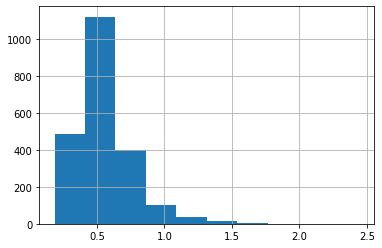

In [ ]:
pd.Series(ratios).hist()

In [ ]:
test_data = superai_images[0]
test_data.shape

(106, 196, 3)

## Export images

In [ ]:
# for i in range(len(superai_images)):
#   image = superai_images[i]
#   if image is not None:
#     path = img_paths_read[i]
#     cv2.imwrite(f'drive/MyDrive/test_one_and_small/{i}__{path}.jpg', image)

## Preprocess

In [ ]:
import cv2

img = test_data
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) #
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)

kernel = np.ones((2,2),np.uint8)
dilation = cv2.dilate(edges,kernel,iterations = 3)
erosion = cv2.erode(dilation,kernel,iterations = 3)
dilation = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)

erosion = (255-dilation)
# ret2, thresh = cv2.threshold(edges,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [ ]:
# inputImage = test_data
# inputImageGray = cv2.cvtColor(inputImage, cv2.COLOR_BGR2GRAY)
# edges = cv2.Canny(inputImageGray,150,200,apertureSize = 3)
# minLineLength = 10
# maxLineGap = 1
# lines = cv2.HoughLinesP(edges,cv2.HOUGH_PROBABILISTIC, np.pi/180, 30, minLineLength,maxLineGap)
# for x in range(0, len(lines)):
#     for x1,y1,x2,y2 in lines[x]:
#         #cv2.line(inputImage,(x1,y1),(x2,y2),(0,128,0),2, cv2.LINE_AA)
#         pts = np.array([[x1, y1 ], [x2 , y2]], np.int32)
#         cv2.polylines(inputImage, [pts], True, (0,255,0))

In [ ]:
show_image_dataset(erosion)

In [ ]:
# # Load image, convert to HSV format, define lower/upper ranges, and perform
# # color segmentation to create a binary mask
# image = test_data
# hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# lower = np.array([0, 0, 218])
# upper = np.array([157, 54, 255])
# mask = cv2.inRange(hsv, lower, upper)

In [ ]:
# show_image_dataset(img)

In [ ]:
show_image_dataset(dilation.astype(np.uint8))

In [ ]:
# GaussianBlur( crop, crop, Size(3,3), 0, 0, BORDER_DEFAULT ); 
# cvtColor( crop, crop, CV_RGB2GRAY );


# SobelEdgeDetect(crop);
# # Converting to bitwise
# # Used adaptiveThreshold to remove shadowed kind of things: adaptiveThreshold(crop,crop,255,CV_ADAPTIVE_THRESH_MEAN_C, CV_THRESH_BINARY,75,10);

In [ ]:
blur = cv2.GaussianBlur(test_data,(5,5),0)
img_gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU) # Remove background using OTSU threshold
threshrgb = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)

In [ ]:
show_image_dataset(threshrgb)

In [ ]:
image = superai_images[7]


blur = cv2.GaussianBlur(image,(5,5),0)

# kernel = np.array([[0, -1, 0],
#                    [-1, 5,-1],
#                    [0, -1, 0]])
# image_sharp = cv2.filter2D(src=blur, ddepth=-1, kernel=kernel)

img_gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
# ret, thresh = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU) # Remove background using OTSU threshold
# thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
threshrgb = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)

# alpha = 0.7 # Contrast control (1.0-3.0)
# beta = 100 # Brightness control (0-100)

# adjusted = cv2.convertScaleAbs(threshrgb, alpha=alpha, beta=beta)

In [ ]:
show_image_dataset(threshrgb)

In [ ]:
images_white = []
for image in superai_images:
  if image is not None:
    blur = cv2.GaussianBlur(image,(5,5),0)
    # # blur = cv2.medianBlur(image,5)

    img_gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    # thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    ret2, thresh = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    # thresh = cv2.adaptiveThreshold(img_gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
    threshrgb = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)

    # # img = test_data
    # img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)
    # # sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
    # # sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
    # # sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) #
    # edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=50)


    # edges = (255-edges)
    # threshrgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
    
    images_white.append(threshrgb)
  else:
    images_white.append(image)

images_white = np.array(images_white)

In [ ]:
show_image_dataset(superai_images[0])

In [ ]:
show_image_dataset(images_white[0])

### Further preprocess

In [ ]:
show_image_dataset(images_white[19])

In [ ]:
# kernel = np.ones((2,2), np.uint8)

# img = cv2.bitwise_not(images_white[5])

# # opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
# closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
# show_image_dataset(closing)

In [ ]:
show_image_dataset(images_white[8])

In [ ]:
def remove_noise(img):
  #find all your connected components (white blobs in your image)
  img = cv2.bitwise_not(img)


  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img, connectivity=8)
  #connectedComponentswithStats yields every seperated component with information on each of them, such as size
  #the following part is just taking out the background which is also considered a component, but most of the time we don't want that.
  sizes = stats[1:, -1]; nb_components = nb_components - 1

  min_size_1 = np.percentile(sizes, 90)
  max_number = -8 if len(sizes) > 8 else - len(sizes)
  min_size_2 = np.sort(sizes)[max_number]

  min_size = min(min_size_1, min_size_2)
  # min_size = 100

  #your answer image
  img2 = np.zeros((output.shape))
  #for every component in the image, you keep it only if it's above min_size
  for i in range(0, nb_components):
      if sizes[i] >= min_size:
          img2[output == i + 1] = 255

  # kernel = np.ones((3,3), np.uint8)
  # # opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
  # img2 = cv.morphologyEx(img2, cv.MORPH_CLOSE, kernel)
  # # show_image_dataset(closing)

  img2 = (255-img2)
  img_float32 = np.float32(img2)
  img2 = cv2.cvtColor(img_float32, cv2.COLOR_GRAY2RGB)
  img2 = img2.astype(np.uint8)
  return img2 

In [ ]:
show_image_dataset(images_white[11])

In [ ]:
result = remove_noise(images_white[11])
show_image_dataset(result)

In [ ]:
result = remove_noise(images_white[10])
show_image_dataset(result)

In [ ]:
images_white_denoised = []
for image in tqdm(images_white):
  if image is not None:
    result = remove_noise(image)
    
    images_white_denoised.append(result)
  else:
    images_white_denoised.append(image)

images_white_denoised = np.array(images_white_denoised)

In [ ]:
show_image_dataset(images_white_denoised[0])

In [ ]:
show_image_dataset(images_white[0])

### Export preprocess

#### Export white

In [ ]:
# for i in range(len(images_white)):
#   image = images_white[i]
#   if image is not None:
#     path = img_paths_read[i]
#     cv2.imwrite(f'drive/MyDrive/SmallTest-processed/{path}.jpg', image) 

#### Export denoised

In [ ]:
# for i in range(len(images_white_denoised)):
#   image = images_white_denoised[i]
#   if image is not None:
#     path = img_paths_read[i]
#     cv2.imwrite(f'drive/MyDrive/SmallTest-processed-denoised/{path}.jpg', image) 

## Load transformers

In [ ]:
from Levenshtein import distance
import numpy as np
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import requests 
from PIL import Image

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten") 
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten").to(device)

# load image from the IAM dataset 
url = "https://fki.tic.heia-fr.ch/static/img/a01-122-02.jpg" 
image_handwritting = Image.open(requests.get(url, stream=True).raw).convert("RGB")

Downloading:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/228 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def get_text_transformeres(image):
  pixel_values = processor(image, return_tensors="pt").pixel_values

  pixel_values_tensor = torch.tensor(pixel_values).cuda()

  generated_ids = model.generate(pixel_values_tensor)
  generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
  return generated_text

In [ ]:
def get_text_transformeres_numeric(image, numeric_index):
  pixel_values = processor(image, return_tensors="pt").pixel_values

  pixel_values_tensor = torch.tensor(pixel_values).cuda()

  # global generated_ids
  result_generated = model.generate(pixel_values_tensor, return_dict_in_generate=True, output_scores=True)
  numeric_index_copy = [2, *numeric_index]

  torch_generated_scores = torch.stack(result_generated['scores'])
  torch_generated_scores = torch_generated_scores.view((torch_generated_scores.shape[0], torch_generated_scores.shape[2]))
  selected_scores = torch_generated_scores[:,numeric_index_copy]
  argmax = torch.argmax(selected_scores, dim = 1).cpu().detach().numpy()

  # print(argmax, numeric_index_copy, 'torch_generated_scores')
  
  new_result = np.array(numeric_index_copy)[argmax][None]
  
  # print(new_result, 'torch_generated_scores2')
  # print(result_generated, 'generated_ids')
  generated_text = processor.batch_decode(result_generated['sequences'], skip_special_tokens=True)[0]
  generated_text_2 = processor.batch_decode(new_result, skip_special_tokens=True)[0]
  return generated_text, generated_text_2

In [ ]:
def filter_number(text):
  numeric_filter = filter(str.isdigit, text)
  result = "".join(numeric_filter)

  return result[:5]

In [ ]:
def filter_number_2(text):
  text_split = text.split(" ")
  results = []
  for text in text_split:
    numeric_filter = filter(str.isdigit, text)
    result = "".join(numeric_filter)
    if result.strip() != "":
      results.append(result)

  if len(results) == 0:
    return ""
  
  return max(results, key=len)

## Train transformers model

In [ ]:
# images_white_dataset = list(filter(lambda x: x is not None, images_white))
images_white_dataset = list(filter(lambda x: x is not None, superai_images_2))

In [ ]:
len(images_white_dataset)

3784

In [ ]:
superai_labels_dataset = list(filter(lambda x: str(x) != 'nan', superai_labels_2))

In [ ]:
superai_labels_dataset[0]

'1500'

In [ ]:
images_white_train, images_white_test, superai_labels_train, superai_labels_test = train_test_split(images_white_dataset, superai_labels_dataset, test_size = 0.8, random_state = 2)

In [ ]:
len(images_white_train)

756

In [ ]:
# images_white_test = images_white_test[:500]
# superai_labels_test = superai_labels_test[:500]

In [ ]:
images_white_test = list(filter(lambda x: x is not None, superai_images))
superai_labels_test = list(filter(lambda x: str(x) != 'nan', superai_labels))

In [ ]:
len(superai_labels_test)

870

In [ ]:
len(superai_labels_test)

870

In [ ]:
# images_white_ardis_train, images_white_ardis_test, images_white_ardis_label_train, images_white_ardis_label_test

In [ ]:
# images_white_ardis_train.shape

In [ ]:
# images_white_ardis_test.shape

In [ ]:
# images_white_ardis_label_train = list(map(str, images_white_ardis_label_train))
# images_white_ardis_label_test = list(map(str, images_white_ardis_label_test))

In [ ]:
!pip install imgaug

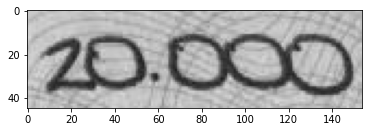

In [ ]:
show_image_dataset(images_white_dataset[11])

In [ ]:
superai_labels_dataset[11]

'20000'

In [ ]:
import imgaug
print(imgaug.__version__)

0.2.9


In [ ]:
# from imgaug import augmenters as iaa
import imgaug.augmenters as iaa
import imgaug as ia
ia.seed(4)

seq = iaa.Sequential([
    iaa.Affine(rotate=(-5, 5)),
    iaa.AdditiveGaussianNoise(scale=(10, 30)),
    iaa.GammaContrast((0.7, 1.5)),
    iaa.GaussianBlur(sigma=(0.0, 1.0)),
    iaa.Crop(percent=(0, 0.05))
])

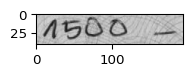

Augmented:


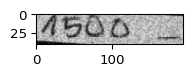

In [ ]:
image = image=images_white_dataset[0]
image_aug = seq(image=image)

ia.imshow(image)
print("Augmented:")
ia.imshow(image_aug)

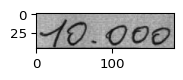

Augmented:


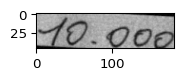

In [ ]:
image = image=images_white_dataset[50]
image_aug = seq(image=image)

ia.imshow(image)
print("Augmented:")
ia.imshow(image_aug)

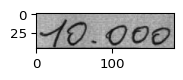

Augmented:


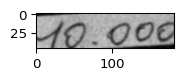

In [ ]:
image = image=images_white_dataset[50]
image_aug = seq(image=image)

ia.imshow(image)
print("Augmented:")
ia.imshow(image_aug)

In [ ]:
import torch
from torch.utils.data import Dataset
from PIL import Image

class DigitSequenceDataset(Dataset):
    def __init__(self, texts, images, processor, max_target_length=16):
        # self.root_dir = root_dir
        # self.df = df
        self.texts = texts
        self.images = images
        self.processor = processor
        self.max_target_length = max_target_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        # # get file name + text 
        # file_name = self.df['file_name'][idx]
        # text = self.df['text'][idx]
        # # prepare image (i.e. resize + normalize)
        # image = Image.open(self.root_dir + file_name).convert("RGB")
        
        text = self.texts[idx]
        image = self.images[idx]
        
        image_aug = seq(image=image)

        pixel_values = self.processor(image_aug, return_tensors="pt").pixel_values
        # add labels (input_ids) by encoding the text
        labels = self.processor.tokenizer(text, 
                                          padding="max_length", 
                                          max_length=self.max_target_length).input_ids
        # important: make sure that PAD tokens are ignored by the loss function
        labels = [label if label != self.processor.tokenizer.pad_token_id else -100 for label in labels]

        encoding = {"pixel_values": pixel_values.squeeze(), "labels": torch.tensor(labels)}
        return encoding

In [ ]:
import torch
from torch.utils.data import Dataset
from PIL import Image

class DigitSequenceDatasetTest(Dataset):
    def __init__(self, texts, images, processor, max_target_length=16):
        # self.root_dir = root_dir
        # self.df = df
        self.texts = texts
        self.images = images
        self.processor = processor
        self.max_target_length = max_target_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        # # get file name + text 
        # file_name = self.df['file_name'][idx]
        # text = self.df['text'][idx]
        # # prepare image (i.e. resize + normalize)
        # image = Image.open(self.root_dir + file_name).convert("RGB")
        
        text = self.texts[idx]
        image = self.images[idx]
        

        pixel_values = self.processor(image, return_tensors="pt").pixel_values
        # add labels (input_ids) by encoding the text
        labels = self.processor.tokenizer(text, 
                                          padding="max_length", 
                                          max_length=self.max_target_length).input_ids
        # important: make sure that PAD tokens are ignored by the loss function
        labels = [label if label != self.processor.tokenizer.pad_token_id else -100 for label in labels]

        encoding = {"pixel_values": pixel_values.squeeze(), "labels": torch.tensor(labels)}
        return encoding

In [ ]:
from transformers import TrOCRProcessor

# train_dataset = DigitSequenceDataset(images=images_white_ardis_train,
#                            texts=images_white_ardis_label_train,
#                            processor=processor)
# eval_dataset = DigitSequenceDataset(images=images_white_ardis_test,
#                            texts=images_white_ardis_label_test,
#                            processor=processor)

train_dataset = DigitSequenceDataset(images=images_white_train,
                           texts=superai_labels_train,
                           processor=processor)
eval_dataset = DigitSequenceDatasetTest(images=images_white_test,
                           texts=superai_labels_test,
                           processor=processor)

In [ ]:
print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(eval_dataset))

Number of training examples: 756
Number of validation examples: 870


In [ ]:
encoding = train_dataset[0]
for k,v in encoding.items():
  print(k, v.shape)

pixel_values torch.Size([3, 384, 384])
labels torch.Size([16])


In [ ]:
labels = encoding['labels']
labels[labels == -100] = processor.tokenizer.pad_token_id
label_str = processor.decode(labels, skip_special_tokens=True)
print(label_str)

1742


In [ ]:
# model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten").to(device)

In [ ]:
# set special tokens used for creating the decoder_input_ids from the labels
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id
# make sure vocab size is set correctly
model.config.vocab_size = model.config.decoder.vocab_size

# set beam search parameters
model.config.eos_token_id = processor.tokenizer.sep_token_id
model.config.max_length = 16
model.config.early_stopping = True
model.config.no_repeat_ngram_size = 3
model.config.length_penalty = 2.0
model.config.num_beams = 4

In [ ]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,
    num_train_epochs=1,
    evaluation_strategy="steps",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    fp16=True, 
    output_dir="./",
    logging_steps=2,
    save_steps=1000,
    eval_steps=200,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
!pip install datasets

     |████████████████████████████████| 306 kB 8.2 MB/s 
     |████████████████████████████████| 1.1 MB 57.0 MB/s 
     |████████████████████████████████| 243 kB 70.9 MB/s 
     |████████████████████████████████| 133 kB 64.9 MB/s 
     |████████████████████████████████| 271 kB 64.9 MB/s 
     |████████████████████████████████| 192 kB 62.4 MB/s 
     |████████████████████████████████| 160 kB 72.8 MB/s 


In [ ]:
# from datasets import load_metric

# cer_metric = load_metric("cer")

In [ ]:
def array_distance(arr1, arr2):
  if len(arr1) != len(arr2):
    raise Error('Array errors')
  total_distance = 0
  for i in range(len(arr1)):
    total_distance += distance(arr1[i], arr2[i])

  return total_distance / len(arr1)

In [ ]:
array_distance(['11', '11'], ['122', '12'])

1.5

In [ ]:
def compute_metrics(pred):
    labels_ids = pred.label_ids
    pred_ids = pred.predictions

    pred_str = processor.batch_decode(pred_ids, skip_special_tokens=True)
    labels_ids[labels_ids == -100] = processor.tokenizer.pad_token_id
    label_str = processor.batch_decode(labels_ids, skip_special_tokens=True)
    # cer = cer_metric.compute(predictions=pred_str, references=label_str)
    edit_distance = array_distance(pred_str, label_str)

    return {"edit_distance": edit_distance}

In [ ]:
from transformers import default_data_collator

# instantiate trainer
trainer = Seq2SeqTrainer(
    model=model,
    tokenizer=processor.feature_extractor,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=default_data_collator,
)
trainer.train()

Using amp half precision backend
***** Running training *****
  Num examples = 756
  Num Epochs = 1
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 95


Step,Training Loss,Validation Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=95, training_loss=0.6076612474886994, metrics={'train_runtime': 80.7908, 'train_samples_per_second': 9.358, 'train_steps_per_second': 1.176, 'total_flos': 5.657036043929518e+17, 'train_loss': 0.6076612474886994, 'epoch': 1.0})

In [ ]:
# import gc

# model.cpu()
# del model
# del trainer
# gc.collect()
# torch.cuda.empty_cache()

In [ ]:
# images_white_ardis_train, images_white_ardis_test, images_white_ardis_label_train, images_white_ardis_label_test
pixel_values = processor(images_white_test[28], return_tensors="pt").pixel_values

pixel_values_tensor = torch.tensor(pixel_values).cuda()

generated_ids = model.generate(pixel_values_tensor)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
generated_text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


'35'

In [ ]:
superai_labels_test[28]

'5'

In [ ]:
distance_list = []
for i in tqdm(range(len(images_white_test[:500]))):
  pixel_values = processor(images_white_test[i], return_tensors="pt").pixel_values

  pixel_values_tensor = torch.tensor(pixel_values).cuda()

  generated_ids = model.generate(pixel_values_tensor)
  generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
  label = superai_labels_test[i]
  distance_list.append(distance(generated_text, label))

In [ ]:
sum(distance_list) / len(distance_list)

In [ ]:
distance_list = []
predicted_texts = []
for i in tqdm(range(len(images_white_test[:500]))):
  pixel_values = processor(images_white_test[i], return_tensors="pt").pixel_values

  pixel_values_tensor = torch.tensor(pixel_values).cuda()

  generated_ids = model.generate(pixel_values_tensor)
  generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
  predicted_text = filter_number(generated_text)
  label = superai_labels_test[i]
  

  predicted_texts.append(predicted_text)
  distance_list.append(distance(predicted_text, label))

In [ ]:
sum(distance_list) / len(distance_list)

In [ ]:
show_image_dataset(images_white_test[0])

In [ ]:
predicted_texts

In [ ]:
superai_labels_test

## Evaluate

In [ ]:
# get_text_transformeres(images_white_denoised[1])

In [ ]:
get_text_transformeres_numeric(superai_images[1], numberic_index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


('87917......', '87917')

In [ ]:
superai_images[1].shape

(669, 1440, 3)

In [ ]:
def get_text_transformeres_numeric_empty_text(image):
  image = cv2.resize(image, (image.shape[1] * 2, image.shape[0] * 2))
  img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU) # Remove background using OTSU threshold
  # thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
  # thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
  image = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)

  pred_text = get_text_transformeres_numeric(image, numberic_index)[1]

  pred_text_clean = filter_number(pred_text)
  return pred_text_clean


In [ ]:
# BLUE = [255,255,255]
# constant= cv2.copyMakeBorder(threshrgb.copy(),10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

In [ ]:
# show_image_dataset(constant)

In [ ]:
result_distances = []
pred_texts = []
pred_text_cleans = []

empty_indexes = []

for i in tqdm(range(len(superai_images[:100]))):
  image = superai_images[i]
  if image is None:
    pred_texts.append('')
    pred_text_cleans.append('')
  else:
    # label = str(images_white_label_test[i])
    # BLUE = [255,255,255]
    # image= cv2.copyMakeBorder(image.copy(),10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)
    pred_text = get_text_transformeres(image)
    # pred_text = get_text_transformeres_numeric(image, numberic_index)[1]
    pred_text_clean = filter_number(pred_text)
    if len(pred_text_clean) == 0:
      empty_indexes.append(i)
      pred_text_clean = get_text_transformeres_numeric_empty_text(image)
    label = superai_labels[i]
    label = label if str(label) != 'nan' else ''
    
    result_distance = distance(pred_text_clean, label)
    
    result_distances.append(result_distance)
    pred_texts.append(pred_text)
    pred_text_cleans.append(pred_text_clean)

  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


In [ ]:
sum(result_distances) / len(result_distances)

0.74

In [ ]:
model.save_pretrained('./model')

Configuration saved in ./model/config.json
Model weights saved in ./model/pytorch_model.bin


In [ ]:
# # Calculate result distance when substitute result with another preprocessing
# new_total_distance = 0
# for i in range(len(result_distances)):
#   if i not in empty_indexes:
#     dis = result_distances[i]
#     new_total_distance += dis
#   else:
#     new_total_distance += 2.1

In [ ]:
# new_total_distance / len(result_distances)

In [ ]:
for i in empty_indexes:
  image = superai_images[i]
  cv2.imwrite(f'drive/MyDrive/sample/predict_none/{i}.jpg', image)

In [ ]:
for i in empty_indexes:
  image = superai_images[i]
  image = cv2.resize(image, (image.shape[1] * 2, image.shape[0] * 2))
  img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU) # Remove background using OTSU threshold
  # thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
  # thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
  
  image = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)
  cv2.imwrite(f'drive/MyDrive/sample/predict_none_processed/{i}.jpg', image)

In [ ]:
show_image_dataset(np.hstack(superai_images[empty_indexes]))

ValueError: ignored

In [ ]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
result = pad_sequences(superai_images[empty_indexes], padding='post')

result.shape

ValueError: ignored

In [ ]:
np.array(superai_labels)[empty_indexes]

array(['66838', '1646', '6963', '3077', '69447', '2616', '282', '4444'],
      dtype='<U5')

In [ ]:
np.array(pred_text_cleans)[empty_indexes]

array(['66566', '16466', '6963', '07011', '67946', '2612', '222', '00000'],
      dtype='<U5')

In [ ]:
# di_total = 0
# for i in empty_indexes:
#   di = distance(superai_labels[i], pred_text_cleans[i])
#   di_total += di

In [ ]:
# di_total / len(empty_indexes)

In [ ]:
check_image = superai_images[empty_indexes[1]]
show_image_dataset(check_image)

In [ ]:
# kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
check_image_sharpen = cv2.filter2D(check_image, -1, kernel)
check_image_sharpen = cv2.resize(check_image_sharpen, (check_image_sharpen.shape[1] * 2, check_image_sharpen.shape[0] * 2))
check_image_sharpen = cv2.filter2D(check_image, -1, kernel)

In [ ]:
check_image_sharpen = cv2.resize(check_image, (check_image.shape[1] * 2, check_image.shape[0] * 2))
img_gray = cv2.cvtColor(check_image_sharpen, cv2.COLOR_BGR2GRAY)
# ret, thresh = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU) # Remove background using OTSU threshold
thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
# thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
threshrgb = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)

In [ ]:
# sr = cv2.dnn_superres.DnnSuperResImpl_create()
# path = "EDSR_x4.pb"
# sr.readModel(path)
# sr.setModel("edsr",4)
# result = sr.upsample(check_image)

In [ ]:
check_image.shape

In [ ]:
check_image_sharpen.shape

In [ ]:
show_image_dataset(threshrgb)

In [ ]:
di_total = 0
for i in tqdm(empty_indexes[:200]):
  image = superai_images[i]
  # kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
  # image  = cv2.filter2D(image, -1, kernel)
  # # image = cv2.resize(image, (image.shape[1] * 2, image.shape[0] * 2))
  # # image = cv2.filter2D(image, -1, kernel)

  image = cv2.resize(image, (image.shape[1] * 2, image.shape[0] * 2))
  img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU) # Remove background using OTSU threshold
  # thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
  # thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
  image = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)

  pred_text = get_text_transformeres_numeric(image, numberic_index)[1]
  # pred_text = get_text_transformeres(image)
  pred_text_clean = filter_number(pred_text)
  label = superai_labels[i]
  label = label if str(label) != 'nan' else ''
  result_distance = distance(pred_text_clean, label)
  di_total += result_distance


# for i in empty_indexes:
#   di = distance(superai_labels[i], pred_text_cleans[i])
  

NameError: ignored

In [ ]:
di_total / len(empty_indexes)

In [ ]:
superai_images

In [ ]:
# count = 0
# empty_indexes = []
# for i in range(len(pred_text_cleans)):
#   # print(len(text), 'check')
#   text = pred_text_cleans[i]
#   if len(text) == 0:
#     empty_indexes.append(i)
#     count += 1


In [ ]:
empty_indexes

In [ ]:
count

In [ ]:
# result_distances = []
# pred_texts = []
# pred_text_cleans = []
# for i in tqdm(range(len(images_white))):
#   image = images_white[i]
#   if image is None:
#     pred_texts.append('')
#     pred_text_cleans.append('')
#   else:
#     # label = str(images_white_label_test[i])
#     # pred_text = get_text_transformeres(image)
#     # pred_text_clean = filter_number(pred_text)
#     pred_text_clean = '11'
#     label = superai_labels[i]
#     result_distance = distance(pred_text_clean, label)
    
#     result_distances.append(result_distance)
#     # pred_texts.append(pred_text)
#     # pred_text_cleans.append(pred_text_clean)
# sum(result_distances) / len(result_distances)

In [ ]:
sum(result_distances) / len(result_distances)

In [ ]:
pred_text_cleans[100]

In [ ]:
show_image_dataset(images_white[100])

In [ ]:
results = pd.Series(pred_text_cleans, dtype="string")

In [ ]:
results

0       61115
1       87917
2        2462
3       58714
4        1674
        ...  
2165     2227
2166     6332
2167     1993
2168      676
2169       33
Length: 2170, dtype: string

In [ ]:
csv

,Id,Predicted,label
0,1a4545ae6128dab578f90fb22b55758a,6152,6152
1,1bc5d2ff9a7e9fdbff5f2f68f42ff64e,87917,87917
2,e297ec8d07a7b8b96c4ae16236d3b442,2462,2462
3,f34c7b3405df590f88d4cf7b046ebed6,38714,38714
4,629ab866836150706a45ee0e9108697a,1674,1674
...,...,...,...
2165,317aa1f54519e65ce1e3855346e7bad4,2227,NaN
2166,b5a3b8d297a574e4406bd11fd5b6ec24,6332,NaN
2167,399434b91e74cb5211c5ea1a301f431a,1993,NaN
2168,17c2c6feeea11a7779d21e6f99b7b714,676,NaN


In [ ]:
csv['Predicted'] = results

In [ ]:
# dummy_submission_csv = csv[['Id', 'label']]

In [ ]:
# dummy_submission_csv.columns = ['Id', 'Predicted']

In [ ]:
# dummy_submission_csv['Predicted'][dummy_submission_csv['Predicted'].isna()] = '11'

In [ ]:
# dummy_submission_csv

In [ ]:
# dummy_submission_csv.to_csv('sample_submission.csv', index=False)

In [ ]:
submission_csv = csv.drop(['label'], axis = 1)

In [ ]:
submission_csv.head(50)

,Id,Predicted
0,1a4545ae6128dab578f90fb22b55758a,61115
1,1bc5d2ff9a7e9fdbff5f2f68f42ff64e,87917
2,e297ec8d07a7b8b96c4ae16236d3b442,2462
3,f34c7b3405df590f88d4cf7b046ebed6,58714
4,629ab866836150706a45ee0e9108697a,1674
5,e9354283b9347e71986d122546c029f0,51236
6,d0e04d5459f95a125099dacc72e9ea01,7796
7,f620c24a7a3a519d91391d6dbb34bc7d,99999
8,815f592afe9145ae0804d692094e5f5b,123
9,ad97c105d62dd6bac2ce2aeb14eed4e5,06030


In [ ]:
submission_csv

,Id,Predicted
0,1a4545ae6128dab578f90fb22b55758a,61115
1,1bc5d2ff9a7e9fdbff5f2f68f42ff64e,87917
2,e297ec8d07a7b8b96c4ae16236d3b442,2462
3,f34c7b3405df590f88d4cf7b046ebed6,58714
4,629ab866836150706a45ee0e9108697a,1674
...,...,...
2165,317aa1f54519e65ce1e3855346e7bad4,2227
2166,b5a3b8d297a574e4406bd11fd5b6ec24,6332
2167,399434b91e74cb5211c5ea1a301f431a,1993
2168,17c2c6feeea11a7779d21e6f99b7b714,676


In [ ]:
# submission_csv['Predicted'] = submission_csv['Predicted'].replace('', '1')

In [ ]:
submission_csv

,Id,Predicted
0,1a4545ae6128dab578f90fb22b55758a,61115
1,1bc5d2ff9a7e9fdbff5f2f68f42ff64e,87917
2,e297ec8d07a7b8b96c4ae16236d3b442,2462
3,f34c7b3405df590f88d4cf7b046ebed6,58714
4,629ab866836150706a45ee0e9108697a,1674
...,...,...
2165,317aa1f54519e65ce1e3855346e7bad4,2227
2166,b5a3b8d297a574e4406bd11fd5b6ec24,6332
2167,399434b91e74cb5211c5ea1a301f431a,1993
2168,17c2c6feeea11a7779d21e6f99b7b714,676


In [ ]:
submission_csv.to_csv('sample_submission.csv', index=False)

In [ ]:
# submission_csv['Predicted'] = submission_csv['Predicted'].replace(r'', '11')

In [ ]:
csv

In [ ]:
csv_sorted = csv.sort_values('Id')

In [ ]:
csv_trimmed = csv_sorted[csv_sorted['Predicted'] != 'N/A']

In [ ]:
csv_trimmed

In [ ]:
csv_trimmed.to_csv('label.csv')